In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Percentile
In a set of numbers, sometimes we want to know which number is greater than most other numbers. In the case of `median`, the `median` is the middle number in a set, which is very useful for describing where most of the set is centered around.

## Computing Percentile
In this class, we define `percentile` as:

The 80th percentile is the value in a set that is at least as large as 80% of the elements in the set. For example, if we have the following set of numbers,

In [3]:
s = [1, 7, 3, 9, 5]

Then the 80th percentile is `7`, since `7` is the number that's at least as large as 4 out of 5 elements in the set. 

#### Another way of for computing the 80th percentile:

$ \frac{80}{100} \times$ `size of set`. In this case, our set `s` has 5 elements, so $ \frac{80}{100} \times 5 = 4 $

And thus, the 80th percentile is the 4th element of `s` ordered. An ordered `s` is [1, 3, 5, 7, 9] and the 4th element of `s` is 7.
<img src = '80.jpg' width = 500/>

If we ask for a percentile that does not exactly correspond to an element, take the next greater element instead. For example, the 81st percentile does not exactly correspond to any of the element in `s` and thus, we take the next element greater than `7`, which is `9`. We chose `9` because it is the only number that's at least as large as the 81% of `s`.

We have actually used percentile before. The `median` is equal to the 50th percentile.

## The `percentile` Function
Definition: the `p`th percentile is the value in a set that is at least as large as the `p`% of the elements in the set.

The function `percentile` is available in the `datascience` module and thus, make sure to import `datascience` beforehand.

The syntax of the `percentile` function is as the following,

In [ ]:
percentile(p, values)

where the argument `p` is a percentile number between 0 to 100, and the argument `values` is either an array or a list. The function returns the `p`th percentile of the array. If we try the percentile from the previous example, it will be as the following,

In [4]:
percentile(80, s)

7

## Discussion Question
Which of these are `True`, if `s` = [1, 7, 3, 9, 5]?

In [5]:
# Statement 1
percentile(10, s) == 0

False

The statement 1 above is `False`. The list `s` does not contain `0` at all, thus it is impossible to return `0`.

The 10th percentile computes to the 1/2th element, which does not correspond to any element in `s`. Thus, we take the next greater element, the 1st element, which is 1.

In [6]:
percentile(10, s)

1

In [7]:
# Statement 2
percentile(39, s) == percentile(40, s)

True

The statement 2 above is `True`. 

The 39th percentile computes to the 1.95th element, which does not correspond to any element in `s`. In this case, we take the next greater element, the 2nd element, which is `3`.

The 40th percentile computes to the 2nd element, which is `3`.

In [8]:
percentile(39, s)

3

In [9]:
percentile(40, s)

3

In [11]:
# Statement 3
percentile(40, s) == percentile(41, s)

False

The statement 3 above is `False`.

From statement 2, we know that the 40th percentile is `3`.

The 41th percentile does not correspond to any element in `s`, and on the same time is greater than the 40th percentile. Thus, it has to be the next greater element after `3`, which is `5`.

In [10]:
percentile(41, s)

5

In [12]:
# Statement 4
percentile(50, s) == 5

True

The statement 5 above is `True`. The 50th percentile computes to the 2.5th element in the array, which does not exactly correspond to any of the element in `s`. Thus, we take the next greater element, which is the 3rd element, `5`.

# Estimation (Review)
We will briefly recap about estimation.

## Inference: Estimation
In estimation, we want to ask: "How big is an unknown parameter?". In the warplanes example, when we want to figure out how many warplanes Germany had, we asked, "How many warplanes are there". 

There are 2 ways of answering this kind of question, depending on whether we have a whole population.
1. If we have the whole population / census, we just calculate the `parameter` and then we're done (without having to calculate probability, statistics, etc.)


2. Unfortunately most of the time we won't have access to the whole population. Instead, we'll only have a sample. However, we can use the sample to find something about the population. The idea of statistical inference is being able to take that sample and draw conclusion about the population without having access to population. In this case:
    * Take a random sample from the population
    * Use the sample and a statistic to **estimate** the parameter (something of interest) in the population

## Demo
Below we have a table containing public services in San Francisco.

In [2]:
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


We'll filter the table above to `Organization Group`, `Job`, and `Total Compensation`. On top of that, we are interested in full-time workers, so we filter out the part-time workers and contractors by filtering out the table so that it only contains employees that had `Total Compensation` above 10,000 US Dollars.

In [3]:
sf = sf.select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


We can sort the table above in descending order to see the first few positions that made the most,

In [4]:
sf.sort('Total Compensation', descending = True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


And we can create a histogram to visualize the distribution of the total compensation above,

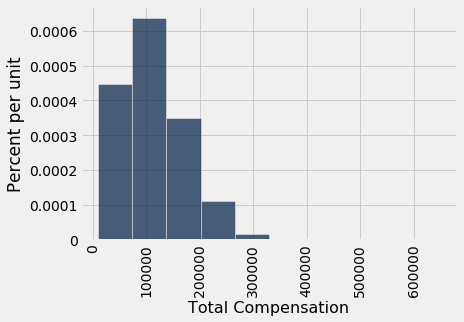

In [5]:
sf.hist('Total Compensation')

The histogram above doesn't look enough detailed for us to obtain information. We can make the histogram more detailed with the following,

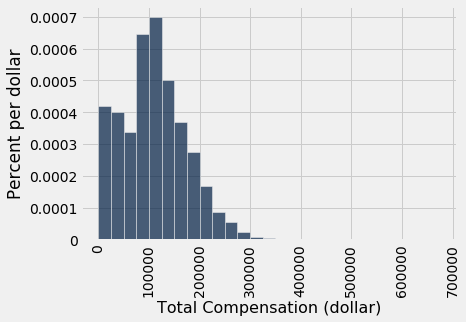

In [6]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

Above, we can see that most people in the data made around 100k, while the Chief Investment Officer alone made a lot more, close to 650k! 

The data above is the entire population of public service workers in San Francisco. This data is available for everyone to access because of some Data Act. 

However, what if we don't have access to this whole population? What if we only have a sample (without replacement) of 200 workers? Let's name this sample `sample_from_population`.

In [7]:
sample_from_population = sf.sample(200, with_replacement = False)
sample_from_population

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Transit Operator,"108,135"
"Public Works, Transportation & Commerce",Senior Water Services Clerk,"103,613"
"Public Works, Transportation & Commerce",Transit Operator,"56,653"
General Administration & Finance,Dept Head II,"260,988"
"Public Works, Transportation & Commerce",Automotive Service Worker,"113,390"
Culture & Recreation,"Operating Engineer, Universal","152,028"
Public Protection,Deputy Sheriff,"161,140"
"Public Works, Transportation & Commerce",Transit Operator,"53,569"
"Public Works, Transportation & Commerce",Engineer,"185,170"
"Public Works, Transportation & Commerce",Parking Control Officer,"15,438"


What if we want to know the `median` of the Total Compensation of our sample?

In [8]:
np.median(sample_from_population.column('Total Compensation'))

109311.70999999999

The number above looks suspicious. Is this also the population's median? We don't know.
If we run the `sample_from_population` cell multiple times, we obtain different samples, and those different samples would give us different medians. We don't know which of those medians are the good one.

## Variability of the Estimate
If we only have one sample, we can only compute one estimate. And thus, if there are 200 employees in our sample, we can only get a `median` of that sample of 200.

However, if we have another random sample of 200, we could have obtained a different `median`.

The main question is:
#### How different could the estimate have been?
Is our sampling procedure likely to give us something that is close to the population median?

If we take multiple samples and compute each of the medians, and obtain medians of a range 100-103k, we might be able to say that the population median is somewhere within that range. However, if it turned out that we obtained a bad sample (e.g. one of the employee made 5k as total compensation), then we might obtain a far lower median.

"How accurate of an estimate can we obtain from the sample?"

The variability of the estimate tells us something about how accurate the estimate (e.g. `median`) is.

## Demo
If we run the cell below multiple times,

In [9]:
sample_from_population = sf.sample(200, with_replacement = False)
np.median(sample_from_population.column('Total Compensation'))

108248.41

With each different samples of 200, we can obtain different medians. However, we want to know the range of these medians. How low or high the median can be? Is our sample procedure accurate?

## Aside: Lists and Append
Off topic, we will cover about **appending to lists**. All this time, we use `np.append` to append an element to an array.

In [10]:
a = make_array(2, 3, 4)
a

array([2, 3, 4])

In [11]:
np.append(a, 5)

array([2, 3, 4, 5])

However, `a` is unchanged! Remember that we need to reassign `a` in order to change `a`.

In [12]:
a

array([2, 3, 4])

Meanwhile, `List`s also have an `append` method. However, `List`s `append` method changes the original `list`.

In [13]:
b = [2, 3, 4]
b

[2, 3, 4]

In [14]:
b.append(5)

In [15]:
b

[2, 3, 4, 5]

Above `append` method is different from `np.append` method. 

## Back to Main Topic
If we take more samples from the population, what is a range of the `median` that we can expect?

Let's start with taking a sample of 200 once again and compute its `median`.

In [16]:
sample_from_population = sf.sample(200, with_replacement = False)
np.median(sample_from_population.column('Total Compensation'))

108189.055

We can put the code above in a loop so that we can see the variation of the `median`.

In [17]:
repetitions = 100
medians = [] # This time we use a list!

for i in np.arange(repetitions):
    sample_from_population = sf.sample(200, with_replacement = False)
    # Since we use a list, the 'append' method is different from what we have used in the past
    medians.append(np.median(sample_from_population.column('Total Compensation'))) 
    
medians

[104999.905,
 102905.86,
 111027.92499999999,
 107102.95999999999,
 117189.175,
 119719.185,
 107528.965,
 107596.36,
 107571.9,
 104754.65,
 107771.13500000001,
 99798.655,
 101003.72,
 94888.9,
 105982.38,
 106964.34,
 108212.755,
 108862.61499999999,
 104302.465,
 115493.73,
 104210.3,
 109504.58499999999,
 109118.505,
 102664.595,
 108340.405,
 109636.88500000001,
 105863.83,
 105623.82,
 107237.68,
 98535.215,
 106952.005,
 103513.53,
 105225.79999999999,
 108707.34,
 111610.60500000001,
 103353.47,
 109070.81,
 99709.10500000001,
 105565.505,
 109043.71,
 105412.655,
 97271.09,
 111851.83499999999,
 106724.37,
 111778.44,
 105024.93,
 98834.14499999999,
 104325.075,
 110964.14,
 106440.38,
 118716.04999999999,
 109447.93,
 97843.9,
 108576.32500000001,
 111749.375,
 109617.32,
 107932.77,
 111794.23499999999,
 109524.45499999999,
 105971.39,
 114505.73999999999,
 107928.465,
 107418.15,
 101104.755,
 104051.645,
 108110.67,
 107548.45999999999,
 109584.86499999999,
 107467.105,
 

Then let's make a table out of the `median`s above.

In [18]:
Table().with_columns(
    'i', np.arange(100),
    'Median', medians
).show(3)

i,Median
0,105000
1,102906
2,111028


And visualize the data above using a `scatter` plot,

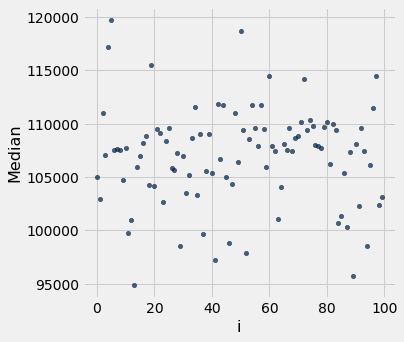

In [19]:
Table().with_columns(
    'i', np.arange(100),
    'Median', medians
).scatter('i')

Above,

1. Each `dot` represent the median of a sample, taken from the population
2. Most of the `dot`s fall between a range 95k to 120k. 

Are we done? Unfortunately, no. And on top of that, **we cheated with the sampling**.

## Where to Get Another Sample?
In real life, we can't go back to the population and take more samples. Imagine the warplanes example, how were we even supposed to take more samples?

Recall that with one sample, we can only get one estimate. If we want to get many values of the estimate, we will need more random samples. Unfortunately, most of the time we can't go back and sample from the population because either we don't have time, or money, or both. 

So what can we do?

# The Bootstrap
This is a method that we can use if we only have one sample and we can't get more. 

In the past, we have been doing examples where we had access to the population. In the warplanes example, we were given information that there were 300 warplanes in the first place. In the SF workers example, we could take more samples since we have access to the population. 

This time, we only have one sample, without access to the population. In this case, we can use **The Bootstrap**, which is a technique for simulating repeated random sampling.

If our original sample is large and randomly drawn from the population, **it will probably resembles the population**. Thus, **we can sample from this sample**.
<img src = 'bootstrap.jpg' width = 700/>

The idea:
1. Treat the original sample as the population
2. Take more samples from the original sample **with replacement** 

This method seems questionable, but we will prove that this method works.

## Key to Resampling

From the original sample,:
1. Draw at random

2. With replacement 

    * Make sure to take sample **with replacement**. If we take sample without replacement, we are just shuffling the sample
    
    
3. As many values as the original sample contained 
    * If we have an original sample of size 200, then take resamples of size 200 each.
    * The size of the new sample has to be the same as the original one, so that the 2 estimates are comparable
    
This gives us a measure of variability of the original sample. 

## Demo
Recall we have our sample from population,

In [20]:
sample_from_population

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Truck Driver,"58,676"
Public Protection,Police Officer,"123,336"
"Public Works, Transportation & Commerce",Transit Operator,"130,359"
"Public Works, Transportation & Commerce",Parking Control Officer,"109,965"
"Public Works, Transportation & Commerce",Custodian,"90,865"
Culture & Recreation,Recreation Leader,"19,226"
"Public Works, Transportation & Commerce",Electrical Transit System Mech,"154,817"
Community Health,Medical Records Clerk,"98,639"
Human Welfare & Neighborhood Development,Medical Social Worker,"134,478"
Public Protection,Firefighter,"211,228"


Let's take the median of the sample above,

In [21]:
np.median(sample_from_population.column('Total Compensation'))

103136.225

Recall that the `sample` method by default takes sample with replacement. If we don't give the method an argument for the sample size, the amount of row in the table we are taking samples from will be our sample size.

In [22]:
resample = sample_from_population.sample()
resample.show(3)

Organization Group,Job,Total Compensation
Community Health,Disease Control Investigator,"102,173"
Human Welfare & Neighborhood Development,Senior Eligibility Worker,"98,850"
"Public Works, Transportation & Commerce",Assoc Engineer,"167,586"


Let's calculate the median of the resample,

In [23]:
np.median(resample.column('Total Compensation'))

107921.62

If we resample and compute the medians multiple times, we can get a sense of the variability of our estimation. Run the cell below multiple times!

In [24]:
resample = sample_from_population.sample()
np.median(resample.column('Total Compensation'))

98499.69

We can create a histogram of the resamples to see the variability of the median.

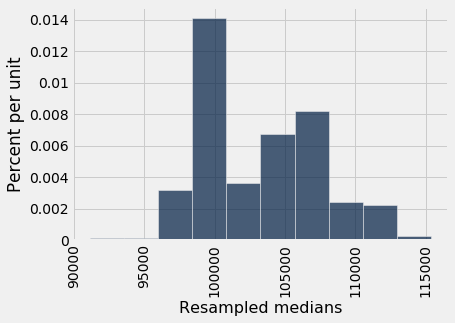

In [25]:
repetitions = 1000
resampled_medians = []

for i in np.arange(repetitions):
    resample = sample_from_population.sample()
    resampled_medians.append(np.median(resample.column('Total Compensation')))
    
Table().with_column('Resampled medians', resampled_medians).hist()

Compare the histogram above with the histogram of the population,

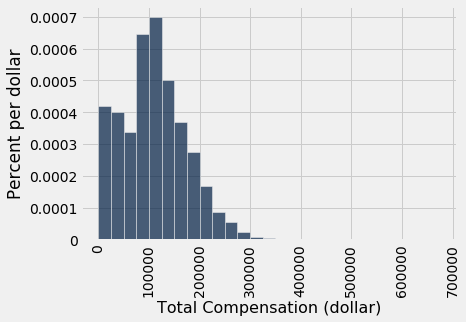

In [26]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

What's the difference between the 2 histograms? What does each histogram show?

In the population histogram above, each bar of the histogram represents the salary of workers on a certain range. The taller the bar, the more the workers that earns that range of salary.

Meanwhile for the resample histogram, each bar represents individual medians instead of individual workers. 

Recall with our scatter plot, most `dots` fall within 95k to 120k range.

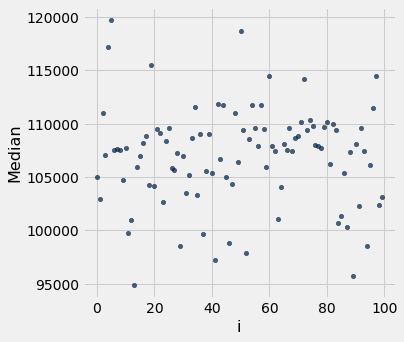

In [29]:
Table().with_columns(
    'i', np.arange(100),
    'Median', medians
).scatter('i')

Looking at the resample histogram, we can ask the same question: "Where do those of the median come in?" . It will give us a sense of where the population parameter might be. 

Now, we can take the middle portion of the resample histogram and use that portion as a measurement of how variable our estimation is. We are going to take the middle 95% and say "that is the range of values that we obtained"

If we want to take the middle 95%, we'll have to shave off the 2.5% off of the left side and another 2.5% off on the right side of the histogram. We can use `percentile` function for this,

In [30]:
print("95% of resampled medians were between",
      percentile(2.5, resampled_medians),
     "and",
     percentile(97.5, resampled_medians))

95% of resampled medians were between 97225.555 and 111008.06


Now let's visualize our computation above with the histogram,

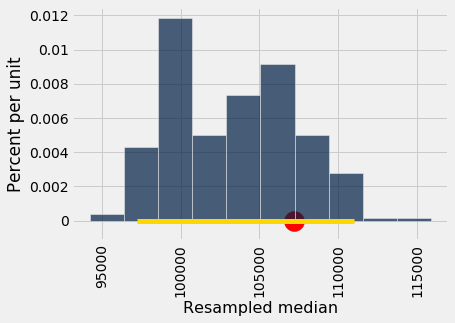

In [31]:
Table().with_column('Resampled median', resampled_medians).hist(0)

# Draw the line and dot
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]
plt.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400)

Above, we have the resample median histogram, in which the yellow line represents the middle 95% and the red dot represents the median of the population.

Note that if we are unlucky and we have a bad sample, it is possible that the actual population median turns out to be outside the yellow line range.

#### How often will this yellow 95% interval contain the actual population median?
Will be answered in the next lecture.